# Libraries and initialisation

In [1]:
from pathlib import Path
import os
import cmcrameri.cm as cmc

COLOR_MAP = cmc.batlow
COLOR_MAP_NAME = 'cmc_batlows'

import dask
dask.config.set(scheduler='threads') 

# Import module
Importing module can take some times since it is linked to multiple other libraries (<30seconds)

In [2]:
from context import CL61_module as mCL61

# Open datasets

In [3]:
# Set some paths to data folder

ceil_path = str(Path(r'C:\Users\gezas\Documents\CL61\Data'))      ## My portable PC
#ceil_path = str(Path(r'D:\gezas\switchdrive\Private\CL61\Data'))  ## MY FIX PC
#ceil_path = str(Path(r'D:\CL61\Data'))                             # USB Key
server_data_folder = r"Q:\archive\GreenFjord\2023\DATA_RAW\CL61"   # Server path
if not os.path.exists(server_data_folder):
    print("check folder")

check folder


In [4]:
start_data = '2023-02-05 00:00:00'
end_data = '2023-02-07 00:00:00'
februar06 = mCL61.CL61Processor(folder_path=ceil_path, start_datetime=start_data, end_datetime=end_data)
# to open 2days of data it takes : 1m10s

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 
                                   filenames  \
2023-02-05 00:02:10  live_20230205_000210.nc   
2023-02-05 00:07:10  live_20230205_000710.nc   
2023-02-05 00:12:10  live_20230205_001210.nc   
2023-02-05 00:17:10  live_20230205_001710.nc   
2023-02-05 00:22:11  live_20230205_002211.nc   
...                                      ...   
2023-02-06 23:37:11  live_20230206_233711.nc   
2023-02-06 23:42:11  live_20230206_234211.nc   
2023-02-06 23:47:10  live_20230206_234710.nc   
2023-02-06 23:52:10  live_20230206_235210.nc   
2023-02-06 23:57:10  live_20230206_235710.nc   

                                                        file_name_path  
2023-02-05 00:02:10  C:\Users\gezas\Documents\CL61\Data\live_202302...  
2023-02-05 00:07:10  C:\Users\gezas\Documents\CL61\Data\live_202302...  
2023-02-05 00:12:10  C:\Users\gezas\Documents\CL61\Data\live_202302...  
2023-02-05 00:17:10  C:\Users\

OSError: [Errno -101] NetCDF: HDF error: b'C:\\Users\\gezas\\Documents\\CL61\\Data\\live_20230206_181210.nc'

In [ ]:
#july18 = mCL61.CL61Processor(folder_path=ceil_path, start_datetime="2023-07-18 00:00:00", end_datetime="2023-07-19 00:00:00")
july18 =  mCL61.CL61Processor(folder_path='../Data', specific_filename='cl61_20230718.nc')

In [ ]:
march19 = mCL61.CL61Processor(folder_path='../Data_daily', specific_filename='cl61_20230319.nc')

In [ ]:
# Or from a specific netcdf file (quicker) 
februar04 = mCL61.CL61Processor(folder_path='../Data', specific_filename='temp_20230204.nc')

In [4]:
# Access archives (takes around 2-3 minutes per day of data)
# This takes 15min with mf_opendataset
first_date = "2023-06-28 00:00:00"
last_date = "2023-06-28 23:59:00"
june = mCL61.CL61Processor(folder_path=server_data_folder,
                           start_datetime=first_date,
                           end_datetime=last_date,
                           parallel_computing=True)

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 
                                                        file_name_path
2023-06-28 00:01:26  Q:\archive\GreenFjord\2023\DATA_RAW\CL61\live_...
2023-06-28 00:06:26  Q:\archive\GreenFjord\2023\DATA_RAW\CL61\live_...
2023-06-28 00:11:26  Q:\archive\GreenFjord\2023\DATA_RAW\CL61\live_...
2023-06-28 00:16:26  Q:\archive\GreenFjord\2023\DATA_RAW\CL61\live_...
2023-06-28 00:21:26  Q:\archive\GreenFjord\2023\DATA_RAW\CL61\live_...
...                                                                ...
2023-06-28 23:36:26  Q:\archive\GreenFjord\2023\DATA_RAW\CL61\live_...
2023-06-28 23:41:26  Q:\archive\GreenFjord\2023\DATA_RAW\CL61\live_...
2023-06-28 23:46:26  Q:\archive\GreenFjord\2023\DATA_RAW\CL61\live_...
2023-06-28 23:51:26  Q:\archive\GreenFjord\2023\DATA_RAW\CL61\live_...
2023-06-28 23:56:26  Q:\archive\GreenFjord\2023\DATA_RAW\CL61\live_...

[283 rows x 1 columns]


In [ ]:
june28 = june.get_subset(start_time="2023-06-28 00:00:00", end_time="2023-06-28 23:59:00")

## (optional) save to compacted file for improved following usages

In [ ]:
june28.dataset.to_netcdf(r"../Data/cl61_20230628-29.nc")

In [ ]:
july18.dataset.to_netcdf(r"../Data/cl61_20230718.nc")
# took 1m30 from usb to pc

In [ ]:
februar04.dataset.to_netcdf(r"../Data/cl61_20230204.nc")

# Plot basic colormesh of raw data

In [ ]:
july18.plot.colormesh(range_limits= [0,8000], save_fig=True)

c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\visualization.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')


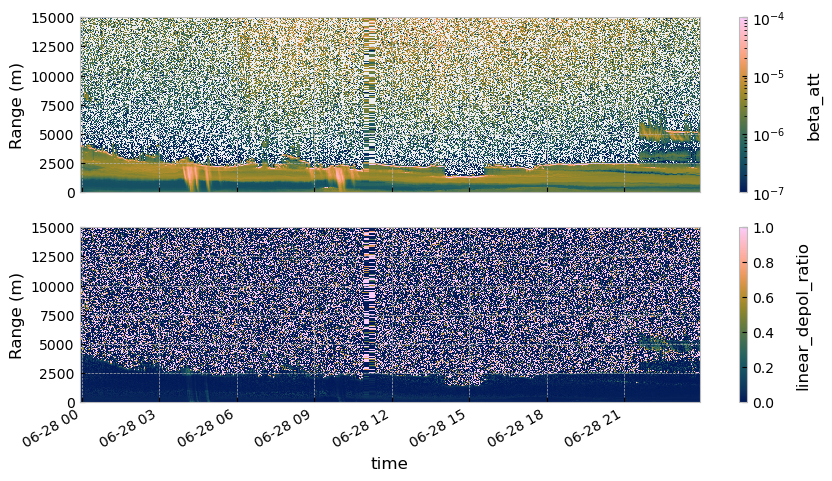

(<Figure size 1000x500 with 4 Axes>,
 [<Axes: ylabel='Range (m)'>, <Axes: xlabel='time', ylabel='Range (m)'>])

In [5]:
june.plot.colormesh()
# (server) takes around 6minutes (normal way)
# (server) take 3min with parrallel computing

In [ ]:
februar04.plot.colormesh(range_limits=[0,15000], save_fig=True)

# Filter out noisy part

In [7]:
june.process.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


In [ ]:
july18.process.mask_noise()

In [ ]:
februar04.process.mask_noise()

# Visualize results without noise

c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\visualization.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')


saved element to ..\Outputs\2023-06-27_colormesh


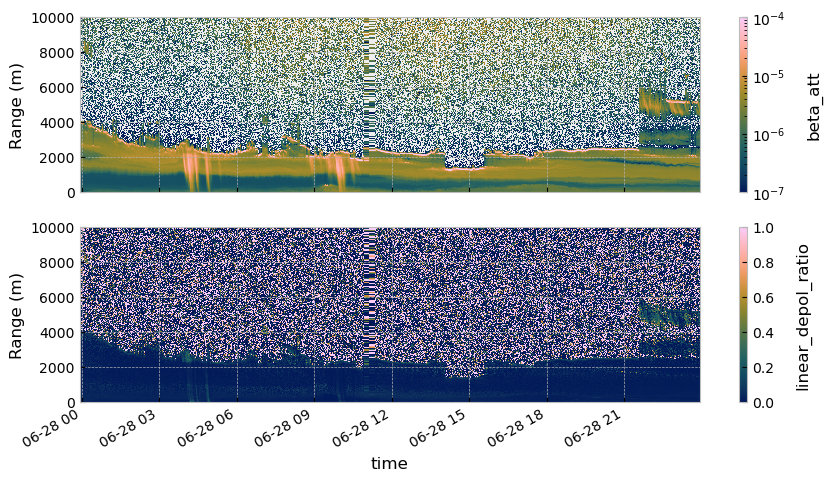

(<Figure size 1000x500 with 4 Axes>,
 [<Axes: ylabel='Range (m)'>, <Axes: xlabel='time', ylabel='Range (m)'>])

In [8]:
june.plot.colormesh(varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'], range_limits=[0,10000], save_fig=True)

In [ ]:
july18.plot.colormesh(varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'], range_limits=[0,10000], save_fig=True)

In [ ]:
februar06.plot.colormesh(varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'], range_limits=[0,10000], save_fig=True)

In [ ]:
februar03.plot.colormesh(varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                          range_limits=[0,15000])

In [ ]:
februar04.plot.colormesh(varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                          range_limits=[0,4000], save_fig=True)

# Visualize as profiles

In [ ]:
from CL61_module import visualization
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (5,7))
ax = visualization.plotVerticalProfiles(februar04.dataset, time_period="2023-02-04 15:00:00", range_limits=[2500,3200], var_xlims=[[1e-7, 1e-4], [0,1]], ax=ax)
plt.title("CL61 profiles of 2023-02-04 15:00:00")
plt.savefig("feb04_15h_vprofiles_noisy_5km.png", dpi=300)

In [ ]:
from CL61_module import visualization
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (5,7))
ax = visualization.plotVerticalProfiles(februar04.dataset, time_period="2023-02-04 09:00:00", range_limits=[0,15000], var_xlims=[[1e-7, 1e-4], [0,1]], ax=ax)
plt.title("CL61 profiles of 2023-02-04 09:00:00")
plt.savefig("feb04_9h_vprofiles_noisy_5km.png", dpi=300)

In [ ]:
visualization.plotVerticalProfiles(june18.dataset, time_period="2023-07-18 03:00:00", var_xlims=[[1e-7, 1e-4], [0,1]])

In [ ]:
june18.plot.compare_profiles(time_period="2023-07-18 03:00:00", comparison='variable', range_limits=[0,5000])

In [ ]:
februar04.plot.vertical_profiles(time_of_interest=["2023-04-02 17:30:00"],
                             var_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                             label_first_profile='beta att clean',
                             label_second_profile= 'linear depol ratio clean',
                             range_limits=[0, 15000],
                             x_scales=['log', 'lin'])

In [ ]:
februar04.plot.compare_profiles(time_period= "2023-02-04 15:00:00", comparison='variable', range_limits=[0,5000])

# Classify

## K-mean classificitaiton

In [ ]:
februar04.process.perform_kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                        weights=[1, 1, 0.25],
                                        cluster_number = 8,
                                        plot_result = True,
                                        kmean_method = 'random')

In [ ]:
from CL61_module import classification_vizalization
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc 

feature1_flatten = np.log10(februar04.dataset['beta_att_clean'].values.flatten())
feature2_flatten = februar04.dataset['linear_depol_ratio_clean'].values.flatten()
cluster_labels_flatten = februar04.dataset['kmean_clusters'].values.flatten()

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize = (15,5), width_ratios=[1, 2])
fig, axes[0] = classification_vizalization.visualize_classification_featurespace_2D(feature1_name='log10_beta_attenuation', feature1_flatten=feature1_flatten,
                                                    feature2_name='linear_depolarisation_ratio', feature2_flatten=feature2_flatten,
                                                    cluster_labels_flatten=cluster_labels_flatten,
                                                    fig = fig,
                                                    ax = axes[0])

fig, axes[1] = classification_vizalization.visualize_Kmean_results(februar04.dataset,
                                    februar04.dataset['kmean_clusters'].T,
                                    num_categories=8,
                                    fig = fig,
                                    ax = axes[1])
    
plt.savefig('../Outputs/feb04_kmeans_N8_range025.jpg', dpi=300)

plt.show()

In [ ]:
februar04.process.classify_clusters()

In [ ]:
februar04.plot.plot_classes_colormesh()

In [ ]:
februar04.process.classify_elementwise()

In [ ]:
februar04.plot.plot_classes_colormesh(variable_classified="classified_elements")

In [ ]:
from matplotlib.colors import ListedColormap
import yaml

def load_config(filepath='../CL61_module/config_classification.yml'):
    print(f'Loading config file at {filepath} ')
    with open(filepath, 'r') as file:
        if file is None:
            raise TypeError('File not found at given filepath')
        config_classification = yaml.safe_load(file)
    return config_classification

cluster_labels_flatten = februar04.dataset['classified_elements'].values.flatten()

config_classification = load_config()
category_colors = config_classification['category_colors']
classification_cmap = ListedColormap(category_colors)

class_combination_mapping = config_classification['class_combination_mapping']
num_categories = len(class_combination_mapping)

classification_vizalization.visualize_classification_featurespace_2D(feature1_name='log10_beta_attenuation', feature1_flatten=feature1_flatten,
                                                    feature2_name='linear_depolarisation_ratio', feature2_flatten=feature2_flatten,
                                                    cluster_labels_flatten=cluster_labels_flatten, cmap=classification_cmap)

# Same but june18

In [ ]:
july18.plot.plot_histogram()

In [ ]:
# Get data folder
july18.process.perform_kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                        weights=[1, 1, 0.25],
                                        cluster_number = 8,
                                        plot_result = True,
                                        kmean_method = 'random')

In [ ]:
from CL61_module import classification_vizalization
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc 

feature1_flatten = np.log10(june18.dataset['beta_att_clean'].values.flatten())
feature2_flatten = june18.dataset['linear_depol_ratio_clean'].values.flatten()
cluster_labels_flatten = june18.dataset['kmean_clusters'].values.flatten()

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize = (15,5), width_ratios=[1, 2])
fig, axes[0] = classification_vizalization.visualize_classification_featurespace_2D(feature1_name='log10_beta_attenuation', feature1_flatten=feature1_flatten,
                                                    feature2_name='linear_depolarisation_ratio', feature2_flatten=feature2_flatten,
                                                    cluster_labels_flatten=cluster_labels_flatten,
                                                    fig = fig,
                                                    ax = axes[0])

axes[1], fig = classification_vizalization.visualize_Kmean_results(june18.dataset,
                                    june18.dataset['kmean_clusters'].T,
                                    num_categories=8,
                                    fig = fig,
                                    ax = axes[1])
axes[1].set_ylim([0,6000])
    
plt.savefig('../Outputs/june18_kmeans_N8_range025.jpg', dpi=300)


In [ ]:
june18.process.classify_clusters()
june18.plot.plot_classes_colormesh()